# Using VARMAX on Stock Prices

### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from tqdm import tqdm_notebook as tqdm
plt.style.use('ggplot')

In [2]:
# Loading the data
df = pd.read_csv("SPY.csv")

# Viewing the DF
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-04,211.229996,212.020004,211.100006,211.320007,191.227142,70927200
1,2015-05-05,211.029999,211.460007,208.729996,208.899994,189.037262,113326200
2,2015-05-06,209.559998,209.929993,206.759995,208.039993,188.259018,135060200
3,2015-05-07,207.919998,209.380005,207.520004,208.869995,189.010117,88244900
4,2015-05-08,210.880005,211.860001,210.779999,211.619995,191.498642,155877300
5,2015-05-11,211.570007,211.889999,210.520004,210.610001,190.584671,75708100
6,2015-05-12,209.610001,210.630005,208.619995,209.979996,190.014572,119727600
7,2015-05-13,210.470001,211.220001,209.740005,210.020004,190.050766,94667900
8,2015-05-14,211.240005,212.320007,210.910004,212.210007,192.032532,95934000
9,2015-05-15,212.440002,212.610001,211.860001,212.440002,192.240662,76510100


## Preprocessing the Data

### Datetime Conversion

In [3]:
# Datetime conversion
df['Date'] = pd.to_datetime(df.Date)

# Setting the index
df.set_index('Date', inplace=True)

# Dropping any NaNs
df.dropna(inplace=True)

### Dropping all Columns except Close

In [4]:
df = df[['Close']]

df

,Close
Date,
2015-05-04,211.320007
2015-05-05,208.899994
2015-05-06,208.039993
2015-05-07,208.869995
2015-05-08,211.619995
2015-05-11,210.610001
2015-05-12,209.979996
2015-05-13,210.020004
2015-05-14,212.210007


### Plotting the Closing Prices

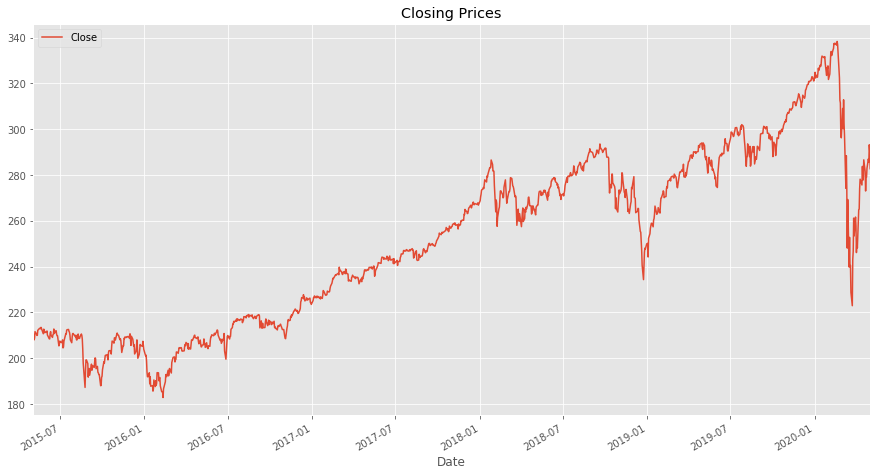

In [5]:
df.plot(figsize=(15,8), title='Closing Prices');

## Detrending

### Differencing the Data

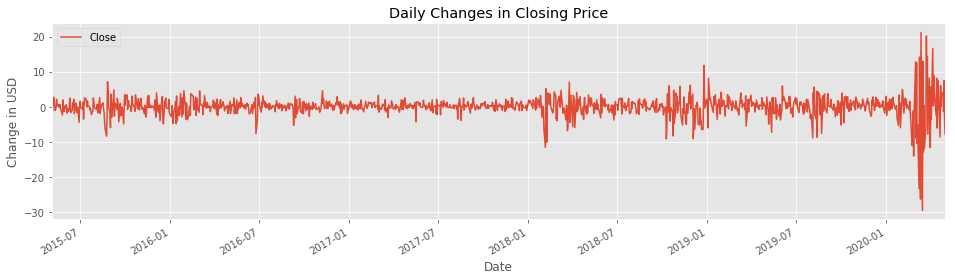

Testing for Stationarity
	P-value: 1.772033572472832e-18


In [10]:
# Differencing
df_diff = df.diff(1).dropna()

# Plotting
df_diff.plot(figsize=(16,4), title="Daily Changes in Closing Price")
plt.ylabel("Change in USD")
plt.show()

# Stationarity Testing
results = adfuller(df_diff.Close)
print(f"Testing for Stationarity\n\tP-value: {results[1]}")

### PACF and ACF

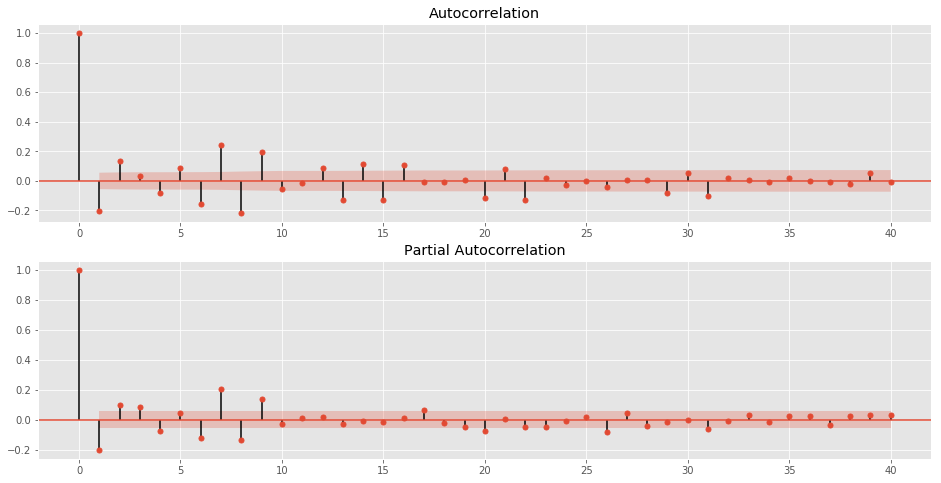

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,8))
plot_acf(df_diff, ax=ax1, lags=40)
plot_pacf(df_diff, ax=ax2, lags=40)
plt.show()

## Modeling

### Splitting
Training and Testing

In [ ]:
# Splitting 80/20
index = round(len(df)*.80)

# Train and Test
train = df.iloc[:index]

test = df.iloc[index:]